/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_79452/743071123.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')


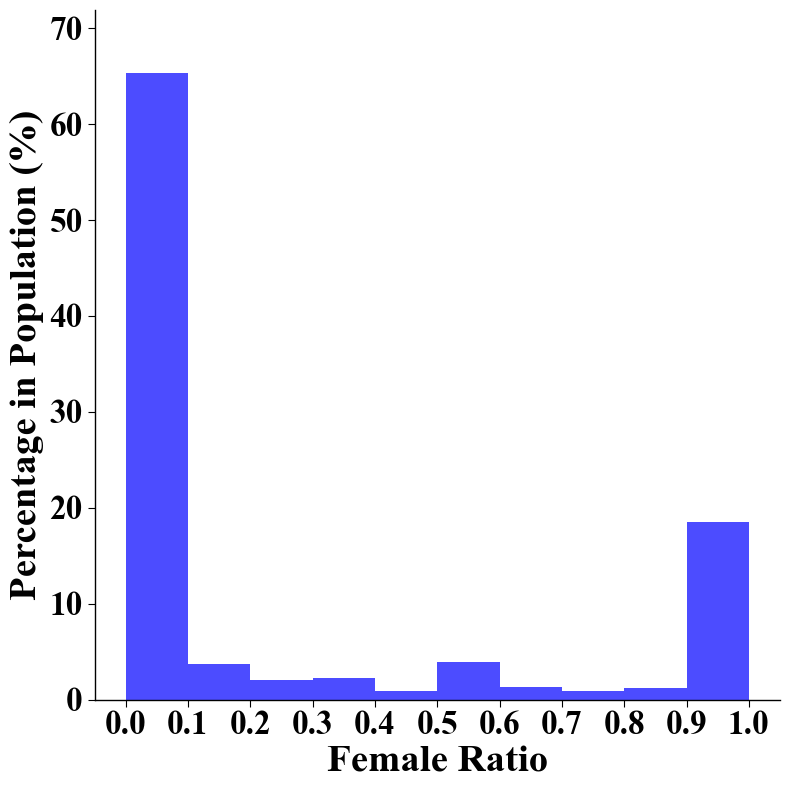

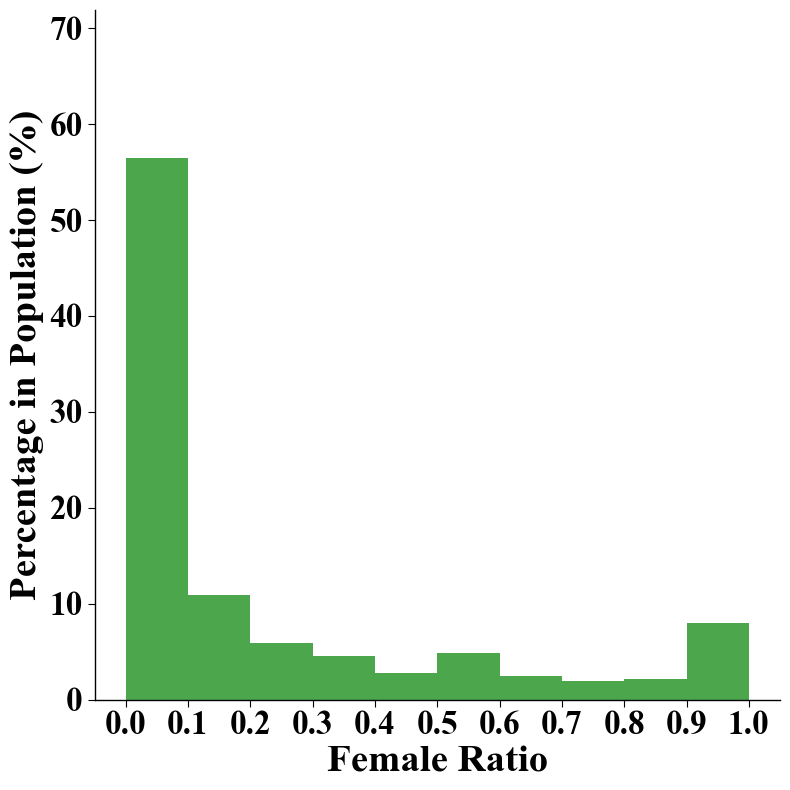

In [177]:
#Fig.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/.../ChineseGender_cleaned1.txt'
data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')
data['1-汉字男性概率'] = 1 - data['汉字男性概率']
data['1-拼音男性概率'] = 1 - data['拼音男性概率']
unique_names = data.groupby('名')['1-汉字男性概率'].mean()
unique_fnames = data.groupby('fname')['1-拼音男性概率'].mean()

bins = np.arange(0, 1.1, 0.1)
hist_names, _ = np.histogram(unique_names, bins=bins)
hist_fnames, _ = np.histogram(unique_fnames, bins=bins)
hist_names_percentage = (hist_names / len(unique_names)) * 100
hist_fnames_percentage = (hist_fnames / len(unique_fnames)) * 100
y_max = max(hist_names_percentage.max(), hist_fnames_percentage.max()) * 1.1

plt.figure(figsize=(8, 8))
plt.bar(bins[:-1], hist_names_percentage, width=0.1, alpha=0.7, color='blue', align='edge')
plt.xlabel('Female Ratio', fontsize=28, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Percentage in Population (%)', fontsize=28, fontname='Times New Roman', fontweight='bold')
plt.xticks(bins, fontsize=24, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=24, fontname='Times New Roman', fontweight='bold')
plt.ylim(0, y_max)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/Users/tongtong/Documents/figure_11.png')
plt.show()

plt.figure(figsize=(8, 8))
plt.bar(bins[:-1], hist_fnames_percentage, width=0.1, alpha=0.7, color='green', align='edge')
plt.xlabel('Female Ratio', fontsize=28, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Percentage in Population (%)', fontsize=28, fontname='Times New Roman', fontweight='bold')
plt.xticks(bins, fontsize=24, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=24, fontname='Times New Roman', fontweight='bold')
plt.ylim(0, y_max)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/Users/tongtong/Documents/figure_12.png')
plt.show()


In [91]:
#merge fig.1
from PIL import Image, ImageDraw, ImageFont

img1 = Image.open('/.../figure_11.png')
img2 = Image.open('/.../figure_12.png')

width1, height1 = img1.size
width2, height2 = img2.size
extra_space = 40 
combined_width = width1 + width2
combined_height = max(height1, height2)+ extra_space
combined_img = Image.new('RGB', (combined_width, combined_height), (255, 255, 255))

combined_img.paste(img1, (0, extra_space))
combined_img.paste(img2, (width1, extra_space))

draw = ImageDraw.Draw(combined_img)
try:
    font = ImageFont.truetype("Times New Roman Bold.ttf", 40)
except IOError:
    font = ImageFont.load_default()

x_offset_a = 10
y_offset_a = 10
draw.text((x_offset_a, y_offset_a), "(a)", font=font, fill=(0, 0, 0))

x_offset_b = width1 + 10
y_offset_b = 10
draw.text((x_offset_b, y_offset_b), "(b)", font=font, fill=(0, 0, 0))

combined_img.save('/Users/tongtong/Documents/Figure1.png')
combined_img.show()


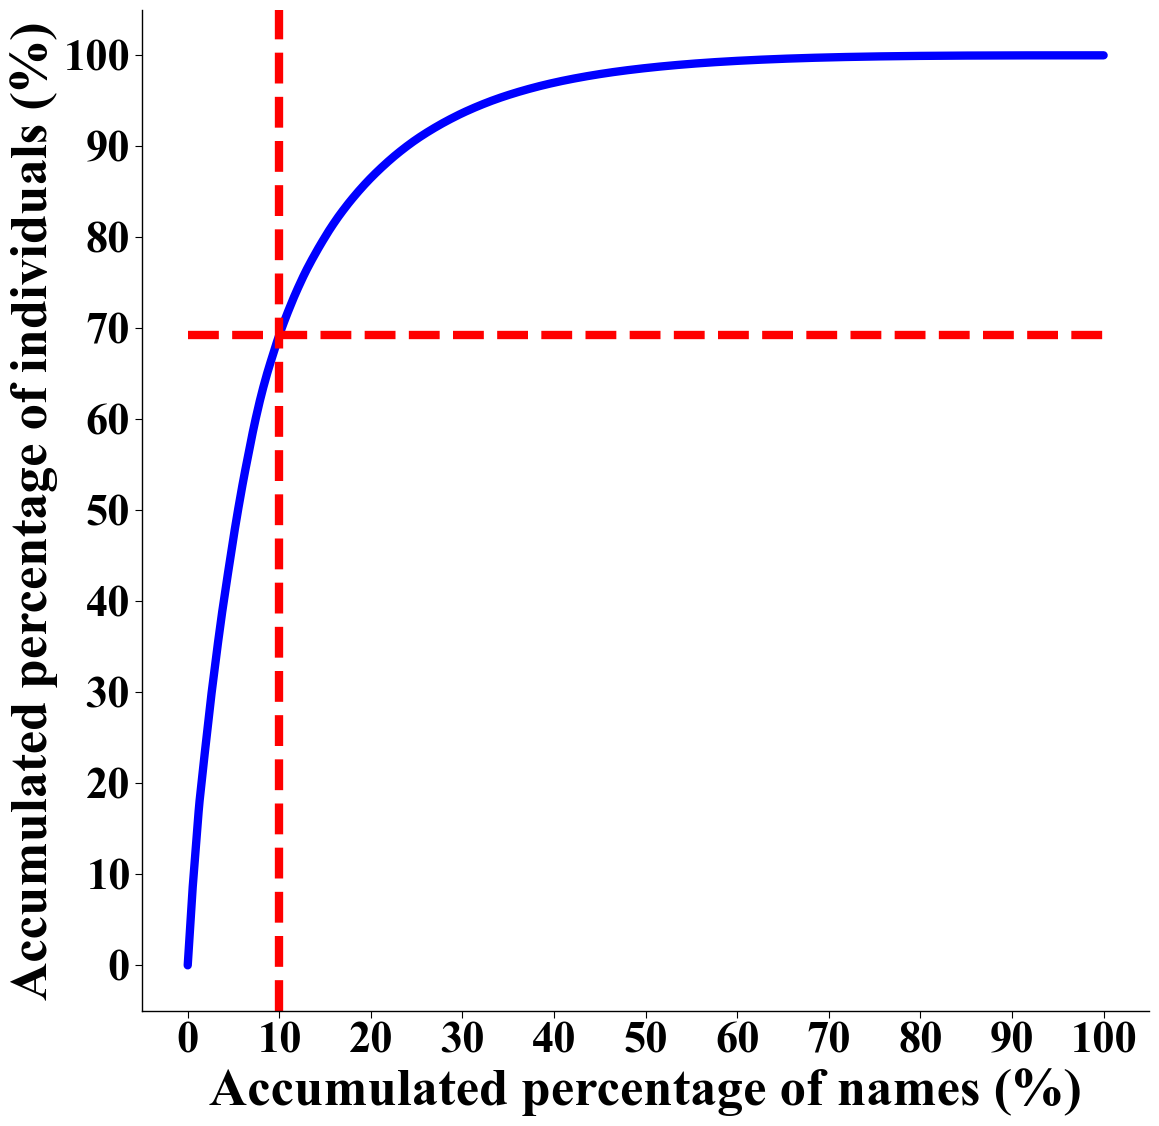

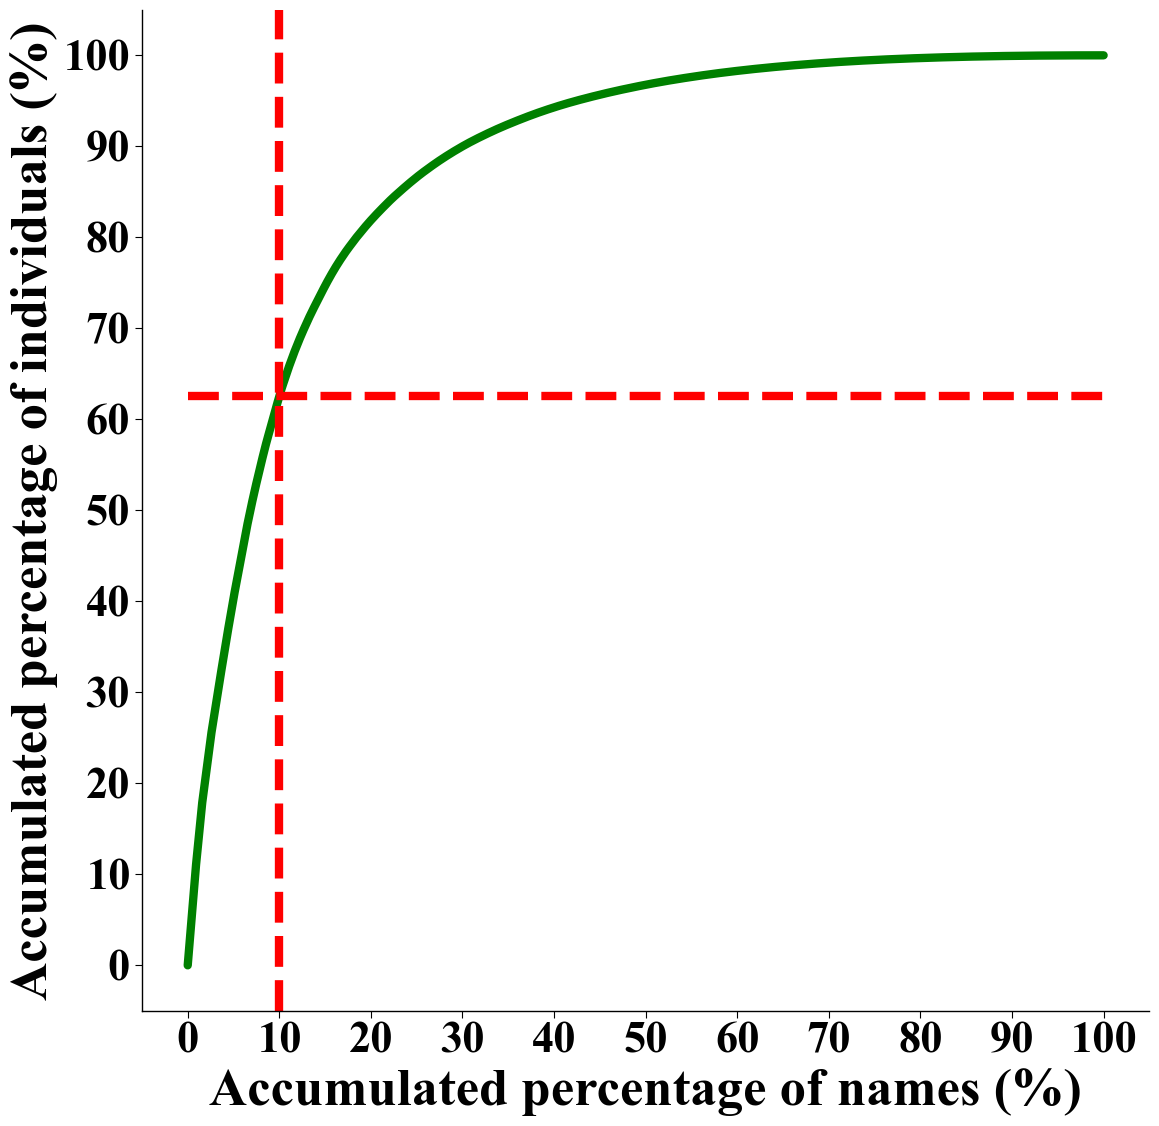

In [47]:
#Fig.2

file_path = '/.../ChineseGender_cleaned1.txt'
columns = ["id", "orig_name", "gender", "b_year", "姓", "名", "lname", "fname", "拼音总数量", "拼音男性数量", "拼音男性概率", "汉字总数量", "汉字男性数量", "汉字男性概率", "orig_name_length"]

df = pd.read_csv(file_path, delimiter='\t', names=columns, skiprows=1, low_memory=False)
df["汉字总数量"] = pd.to_numeric(df["汉字总数量"], errors='coerce')
df["拼音总数量"] = pd.to_numeric(df["拼音总数量"], errors='coerce')
df = df.dropna(subset=["汉字总数量", "拼音总数量"])

df_sorted_hanzi = df.sort_values(by="汉字总数量", ascending=False)
df_sorted_pinyin = df.sort_values(by="拼音总数量", ascending=False)

hanzi_cumulative_percentage = df_sorted_hanzi["汉字总数量"].cumsum() / df_sorted_hanzi["汉字总数量"].sum() * 100
pinyin_cumulative_percentage = df_sorted_pinyin["拼音总数量"].cumsum() / df_sorted_pinyin["拼音总数量"].sum() * 100

x_values = [i / len(df) * 100 for i in range(1, len(df) + 1)]

plt.figure(figsize=(13, 13))
plt.plot(x_values, hanzi_cumulative_percentage, label='Chinese', color='blue', linewidth=6)
plt.xlabel('Accumulated percentage of names (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Accumulated percentage of individuals (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.axvline(x=10, color='red', linestyle='--', label='x=10', linewidth=6)


x_array = np.array(x_values)
index_closest = (np.abs(x_array - 10)).argmin()
y_value_at_10 = hanzi_cumulative_percentage.iloc[index_closest]


plt.hlines(y=y_value_at_10, xmin=0, xmax=100, colors='red', linestyles='--', linewidth=6)
plt.xticks(range(0, 101, 10), fontsize=32, fontname='Times New Roman', fontweight='bold')
plt.yticks(range(0, 110, 10), fontsize=32, fontname='Times New Roman', fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/.../figure_21.png')
plt.show()

plt.figure(figsize=(13, 13))
plt.plot(x_values, pinyin_cumulative_percentage, label='Chinese Pinyin', color='green', linewidth=6)
plt.xlabel('Accumulated percentage of names (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Accumulated percentage of individuals (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.axvline(x=10, color='red', linestyle='--', label='x=10', linewidth=6)

index_closest_pinyin = (np.abs(x_array - 10)).argmin()
y_value_at_10_pinyin = pinyin_cumulative_percentage.iloc[index_closest_pinyin]

plt.hlines(y=y_value_at_10_pinyin, xmin=0, xmax=100, colors='red', linestyles='--', linewidth=6)
plt.xticks(range(0, 101, 10), fontsize=32, fontname='Times New Roman', fontweight='bold')
plt.yticks(range(0, 110, 10), fontsize=32, fontname='Times New Roman', fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/.../figure_22.png')
plt.show()


In [89]:
#merge Fig.2
from PIL import Image, ImageDraw, ImageFont

img1 = Image.open('/.../figure_21.png')
img2 = Image.open('/.../figure_22.png')

width1, height1 = img1.size
width2, height2 = img2.size

combined_width = width1 + width2
combined_height = max(height1, height2)
combined_img = Image.new('RGB', (combined_width, combined_height), (255, 255, 255))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (width1, 0))

draw = ImageDraw.Draw(combined_img)
try:
    font = ImageFont.truetype("Times New Roman Bold.ttf", 50)
except IOError:
    font = ImageFont.load_default()

x_offset_a = 10
y_offset_a = 40
draw.text((x_offset_a, y_offset_a), "(a)", font=font, fill=(0, 0, 0))

x_offset_b = width1 + 10
y_offset_b = 40
draw.text((x_offset_b, y_offset_b), "(b)", font=font, fill=(0, 0, 0))

combined_img.save('/.../Figure2.png')
combined_img.show()


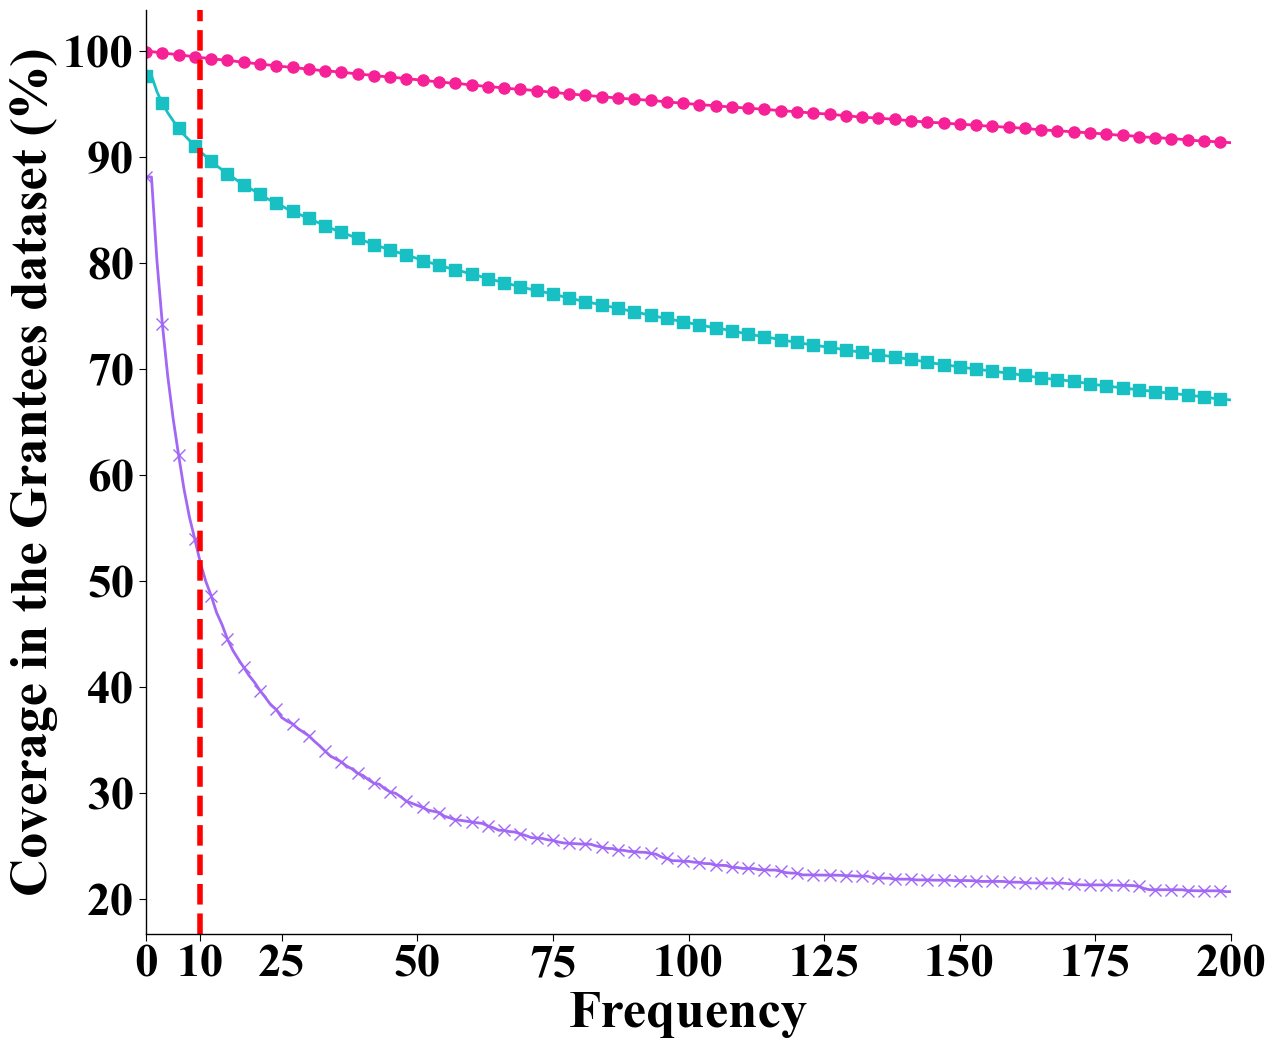

In [127]:
#Fig3-grantees-frequency threshold
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

df = pd.read_csv('/.../grantees.csv', sep='\t')
columns = ['汉字总数量', '拼音总数量', 'count']
total_count = df.shape[0]
results = {col: [] for col in columns}

for col in columns:
    for threshold in range(0, 201):  
        count_at_or_above_threshold = df[df[col] >= threshold].shape[0]
        proportion = (count_at_or_above_threshold / total_count) * 100
        results[col].append(proportion)

plt.rcParams.update({
    'legend.fontsize': 14,  
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.axisbelow': True,
    'font.family': 'sans-serif',
    'grid.linestyle': '-',
    'lines.solid_capstyle': 'round',
    'axes.grid': False,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 1,  
    'xtick.major.size': 5,  
    'ytick.major.size': 5, 
    'xtick.minor.size': 3,  
    'ytick.minor.size': 3,  
    'text.color': 'black',  
    'axes.labelcolor': 'black',  
    'xtick.color': 'black',  
    'ytick.color': 'black', 
    'grid.color': '#2A3459',  
    'font.sans-serif': ['Overpass', 'Helvetica', 'Helvetica Neue', 'Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.prop_cycle': cycler('color', ['#18c0c4', '#f62196', '#A267F5', '#f3907e', '#ffe46b', '#fefeff']),
    'image.cmap': 'RdPu',
    'figure.facecolor': 'white', 
    'axes.facecolor': 'white',  
    'savefig.facecolor': 'white',  
    'xtick.labelsize': 16,  
    'ytick.labelsize': 16,  
    'axes.labelsize': 16  
})

plt.figure(figsize=(14, 12))
legend_descriptions = {
    '拼音总数量': 'Chinese Pinyin',
    '汉字总数量': 'Chinese',
    'count': 'Genderize.io',
}
markers_dict = {
    '拼音总数量': 'o',   
    '汉字总数量': 's',   
    'count': 'x'        
}

x_points = list(range(0, 201))

for col in columns:
    plt.plot(x_points, results[col], marker=markers_dict[col], markersize=8,markevery=3, linestyle='-', label=legend_descriptions[col],linewidth=2)


plt.xlabel('Frequency', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Coverage in the Grantees dataset (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.xlim(0, 200)  
plt.axvline(x=10, color='red', linestyle='--', linewidth=4)  
xticks = list(plt.xticks()[0]) 
if 10 not in xticks:
    xticks.append(10)  
xticks = sorted(xticks)  
plt.xticks(xticks,fontsize=34, fontname='Times New Roman', fontweight='bold')  
plt.yticks(fontsize=34, fontname='Times New Roman', fontweight='bold')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(False)
plt.savefig('/.../figure_31.png', dpi=300, bbox_inches='tight')
plt.show()


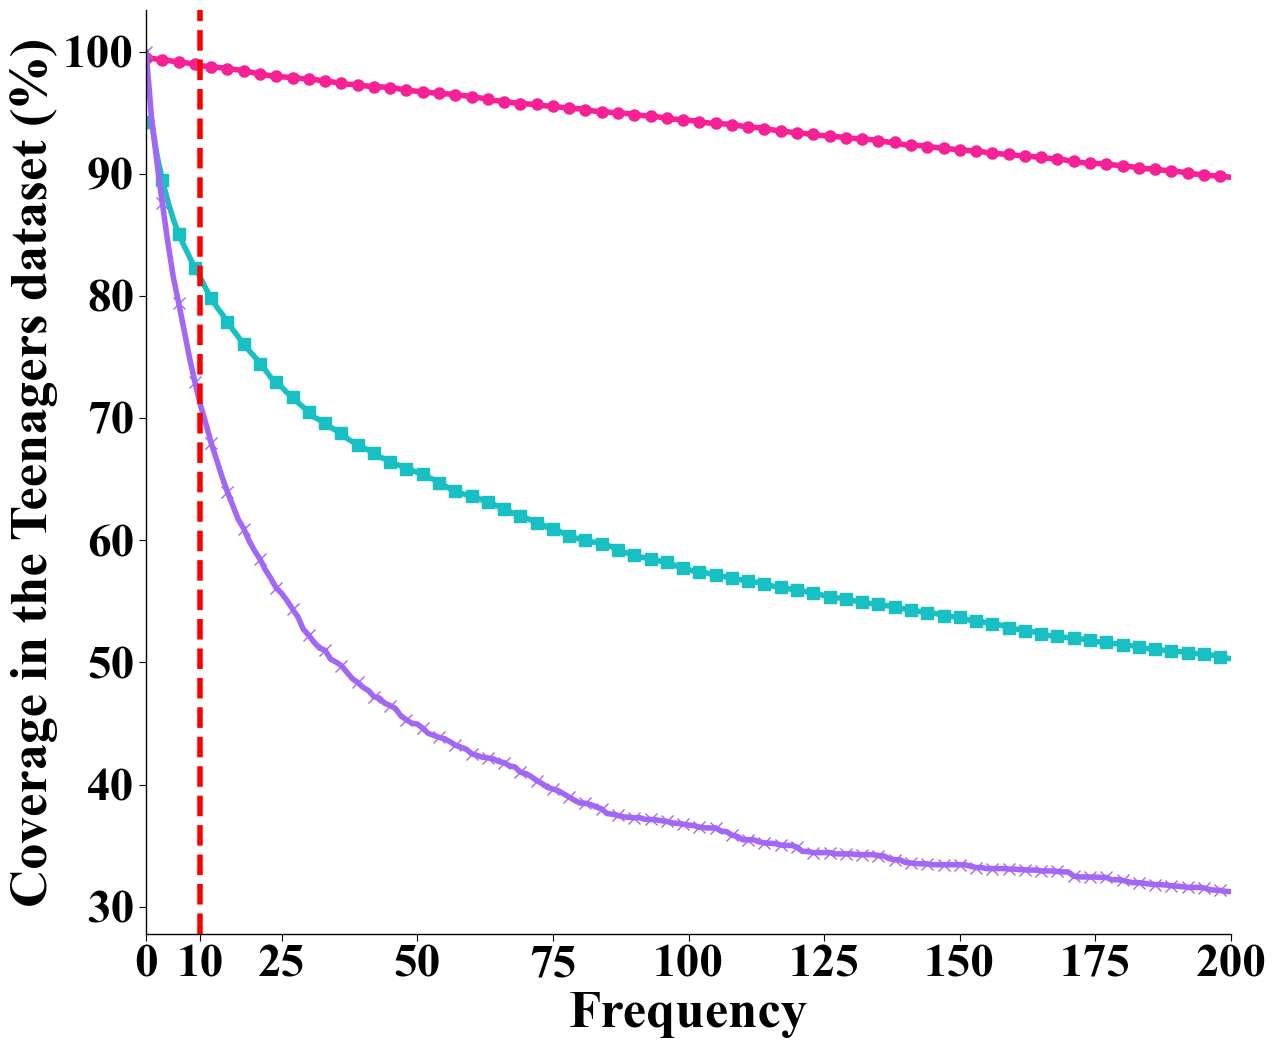

In [131]:
#Fig3-teenagers-frequency threshold
df = pd.read_csv('/.../teenagers.csv', sep='\t')

columns = ['汉字总数量', '拼音总数量', 'Gender Count']

total_count = df.shape[0]

results = {col: [] for col in columns}

for col in columns:
    for threshold in range(0, 201):  
        count_at_or_above_threshold = df[df[col] >= threshold].shape[0]
        proportion = (count_at_or_above_threshold / total_count) * 100
        results[col].append(proportion)

plt.rcParams.update({
    'legend.fontsize': 14,  
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.axisbelow': True,
    'font.family': 'sans-serif',
    'grid.linestyle': '-',
    'lines.solid_capstyle': 'round',
    'axes.grid': False,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 1,  
    'xtick.major.size': 5,  
    'ytick.major.size': 5,  
    'xtick.minor.size': 3,  
    'ytick.minor.size': 3,  
    'text.color': 'black',  
    'axes.labelcolor': 'black',  
    'xtick.color': 'black',  
    'ytick.color': 'black',  
    'grid.color': '#2A3459',  
    'font.sans-serif': ['Overpass', 'Helvetica', 'Helvetica Neue', 'Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.prop_cycle': cycler('color', ['#18c0c4', '#f62196', '#A267F5', '#f3907e', '#ffe46b', '#fefeff']),
    'image.cmap': 'RdPu',
    'figure.facecolor': 'white',  
    'axes.facecolor': 'white',  
    'savefig.facecolor': 'white',  
    'xtick.labelsize': 16,  
    'ytick.labelsize': 16,  
    'axes.labelsize': 16 
})

plt.figure(figsize=(14, 12))

legend_descriptions = {
    '拼音总数量': 'Chinese Pinyin',
    '汉字总数量': 'Chinese',
    'Gender Count': 'Genderize.io',
}
markers_dict = {
    '拼音总数量': 'o',   
    '汉字总数量': 's',   
    'Gender Count': 'x'        
}
x_points = list(range(0, 201))
for col in columns:
    plt.plot(x_points, results[col], marker=markers_dict[col], markersize=8,markevery=3, linestyle='-', label=legend_descriptions[col],linewidth=4)
    
#plt.title('Name Coverage by Frequency Using Different Methods', fontsize=22)
plt.xlabel('Frequency', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Coverage in the Teenagers dataset (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.xlim(0, 200)  
plt.axvline(x=10, color='red', linestyle='--', linewidth=4)  
xticks = list(plt.xticks()[0]) 
if 10 not in xticks:
    xticks.append(10)  
xticks = sorted(xticks)  
plt.xticks(xticks,fontsize=34, fontname='Times New Roman', fontweight='bold') 
plt.yticks(fontsize=34, fontname='Times New Roman', fontweight='bold')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(False)
plt.savefig('/.../figure_32.png', dpi=300, bbox_inches='tight')
plt.show()


Columns in DataFrame: Index(['name_x', 'gender', 'birthyear', 'psncode', 'family', 'given',
       'givenEn', 'name', 'country_id', 'gender_genderize', 'probability',
       'count', '汉字总数量', '汉字男性概率', '拼音总数量', '拼音男性概率',
       'genderize_predict_male'],
      dtype='object')


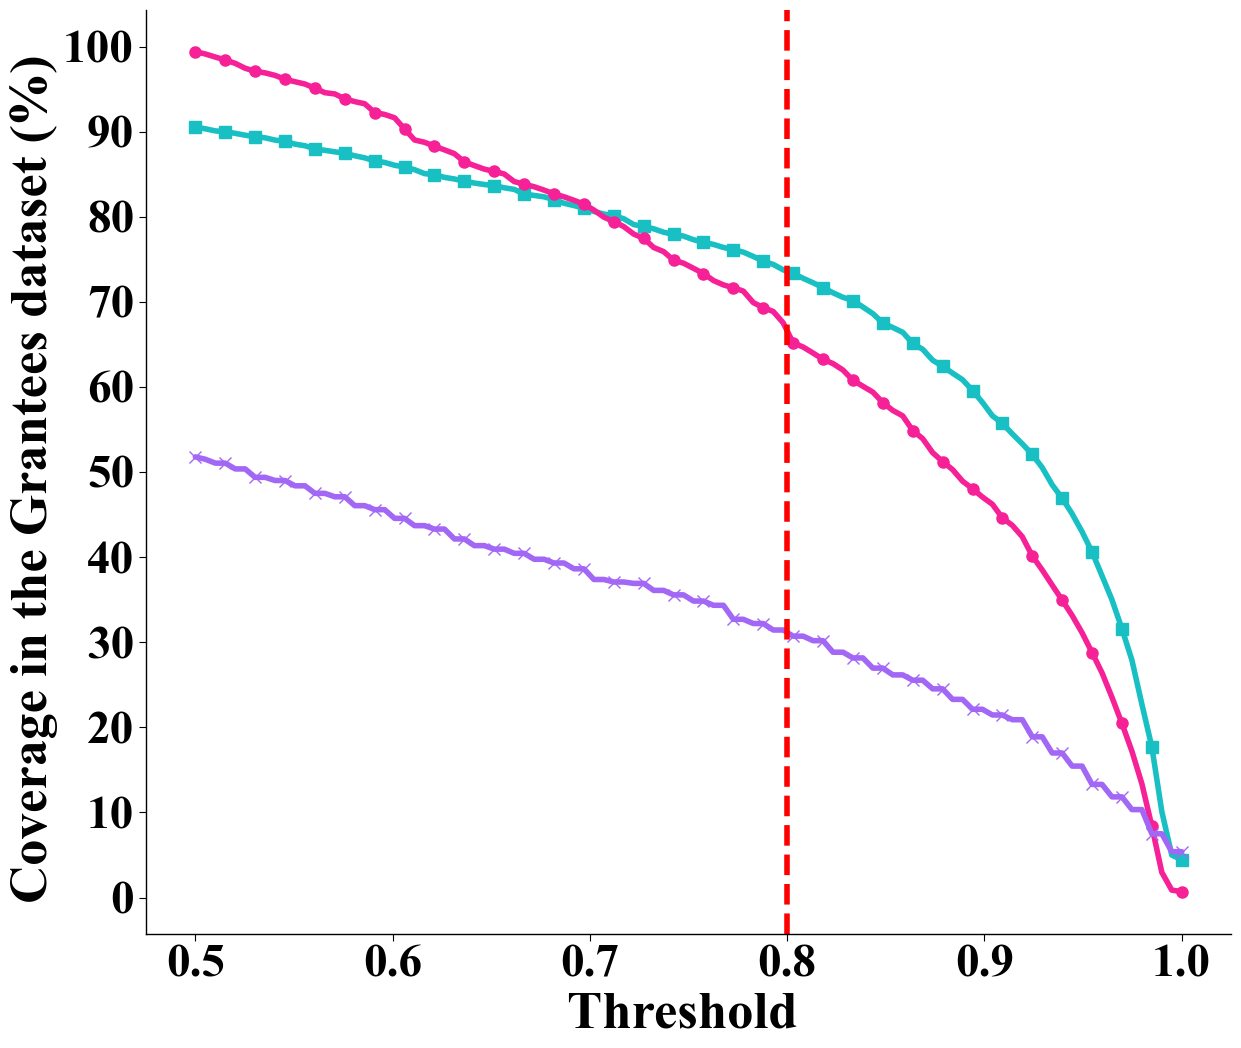

In [133]:
#Fig3-grantees -coverage&threshold
plt.rcParams.update({
    'legend.fontsize': 14 , 
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.axisbelow': True,
    'font.family': 'sans-serif',
    'grid.linestyle': '-',
    'lines.solid_capstyle': 'round',
    'axes.grid': False,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 1,  
    'xtick.major.size': 5,  
    'ytick.major.size': 5,  
    'xtick.minor.size': 3,  
    'ytick.minor.size': 3,  
    'text.color': 'black',  
    'axes.labelcolor': 'black',  
    'xtick.color': 'black',  
    'ytick.color': 'black',  
    'grid.color': '#2A3459',  
    'font.sans-serif': ['Overpass', 'Helvetica', 'Helvetica Neue', 'Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.prop_cycle': cycler('color', ['#18c0c4', '#f62196', '#A267F5', '#f3907e', '#ffe46b', '#fefeff']),
    'image.cmap': 'RdPu',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.labelsize': 14
})

file_path = '/.../grantees.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep='\t')

print("Columns in DataFrame:", df.columns)

column_name_hanzi = '汉字总数量'
column_name_pinyin = '拼音总数量'
column_name_gender = 'count'

if column_name_hanzi in df.columns and column_name_pinyin in df.columns and column_name_gender in df.columns:
    df_hanzi = df[df[column_name_hanzi] >= 10]
    df_pinyin = df[df[column_name_pinyin] >= 10]
    df_gender_count = df[df[column_name_gender] >= 10]

    x_values = np.linspace(0.5, 1, 100)

    def calculate_proportion(df_subset, probability_column):
        y_values = []
        total_count = len(df) 
        for x in x_values:
            count = df_subset[(df_subset[probability_column] >= x) | (df_subset[probability_column] <= (1 - x))].shape[0]
            y_values.append((count / total_count * 100) if total_count > 0 else 0)  
        return y_values

    y_values_hanzi_prob = calculate_proportion(df_hanzi, '汉字男性概率')
    y_values_pinyin_prob = calculate_proportion(df_pinyin, '拼音男性概率')
    y_values_genderize_prob = calculate_proportion(df_gender_count, 'genderize_predict_male')
    
marker_styles = {
    '汉字男性概率': 's',   # (square)
    '拼音男性概率': 'o',   # (circle)
    'genderize_predict_male': 'x'  #(x)
}
plt.figure(figsize=(14, 12))
plt.plot(x_values, y_values_hanzi_prob, marker=marker_styles['汉字男性概率'], markersize=8, markevery=3, linestyle='-', color='#18c0c4', label='Chinese', linewidth=4)
plt.plot(x_values, y_values_pinyin_prob, marker=marker_styles['拼音男性概率'], markersize=8, markevery=3, linestyle='-', color='#f62196', label='Chinese Pinyin', linewidth=4)
plt.plot(x_values, y_values_genderize_prob, marker=marker_styles['genderize_predict_male'], markersize=8, markevery=3, linestyle='-', color='#A267F5', label='Genderize.io', linewidth=4)
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=4)
plt.xlabel('Threshold ', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Coverage in the Grantees dataset (%) ', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=34, fontname='Times New Roman', fontweight='bold')
plt.yticks(np.arange(0, 101, 10),fontsize=34, fontname='Times New Roman', fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.savefig('/.../figure_33.png',dpi=300, bbox_inches='tight')
plt.show()


Columns in DataFrame: Index(['姓名', '性别', 'surname', 'given_name', 'given_name_pinyin',
       'gender_numeric', 'country_x', 'name', 'country_y', 'Gender',
       'Gender Probability', 'Gender Count', '汉字总数量', '汉字男性概率', '拼音总数量',
       '拼音男性概率', 'genderize_predict_male'],
      dtype='object')


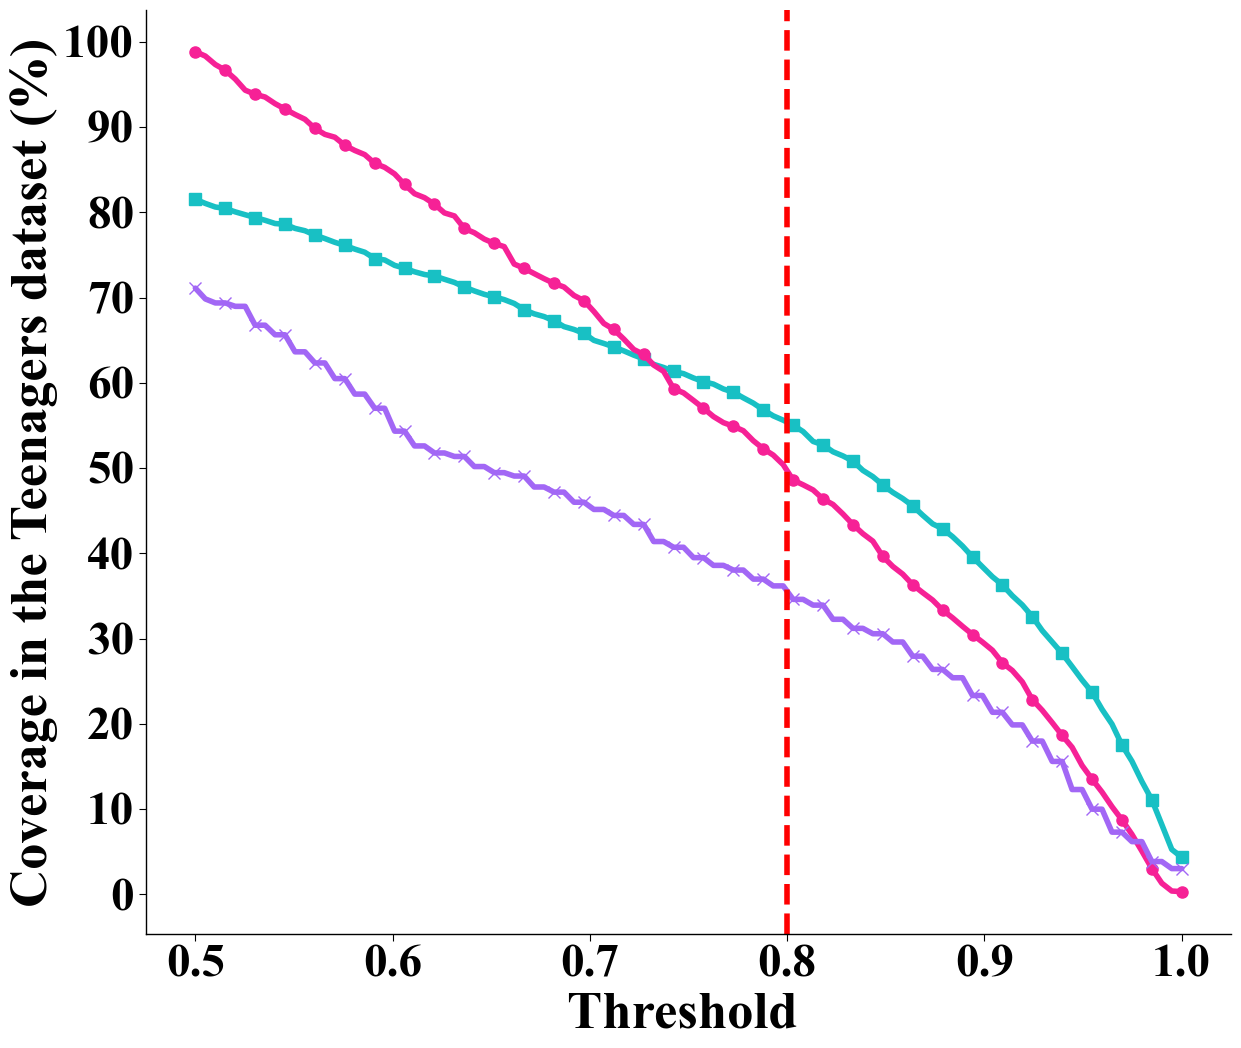

In [135]:
#Fig3-teenagers -coverage&threshold
plt.rcParams.update({
    'legend.fontsize': 14 , 
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.axisbelow': True,
    'font.family': 'sans-serif',
    'grid.linestyle': '-',
    'lines.solid_capstyle': 'round',
    'axes.grid': False,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 1, 
    'xtick.major.size': 5,  
    'ytick.major.size': 5,  
    'xtick.minor.size': 3,  
    'ytick.minor.size': 3,  
    'text.color': 'black',  
    'axes.labelcolor': 'black',  
    'xtick.color': 'black',  
    'ytick.color': 'black',  
    'grid.color': '#2A3459',  
    'font.sans-serif': ['Overpass', 'Helvetica', 'Helvetica Neue', 'Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.prop_cycle': cycler('color', ['#18c0c4', '#f62196', '#A267F5', '#f3907e', '#ffe46b', '#fefeff']),
    'image.cmap': 'RdPu',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.labelsize': 14
})

file_path = '/.../teenagers.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep='\t')

print("Columns in DataFrame:", df.columns)

column_name_hanzi = '汉字总数量'
column_name_pinyin = '拼音总数量'
column_name_gender = 'Gender Count'

if column_name_hanzi in df.columns and column_name_pinyin in df.columns and column_name_gender in df.columns:
    df_hanzi = df[df[column_name_hanzi] >= 10]
    df_pinyin = df[df[column_name_pinyin] >= 10]
    df_gender_count = df[df[column_name_gender] >= 10]
    x_values = np.linspace(0.5, 1, 100)

    def calculate_proportion(df_subset, probability_column):
        y_values = []
        total_count = len(df)  
        for x in x_values:
            count = df_subset[(df_subset[probability_column] >= x) | (df_subset[probability_column] <= (1 - x))].shape[0]
            y_values.append((count / total_count * 100) if total_count > 0 else 0) 
        return y_values

    y_values_hanzi_prob = calculate_proportion(df_hanzi, '汉字男性概率')
    y_values_pinyin_prob = calculate_proportion(df_pinyin, '拼音男性概率')
    y_values_genderize_prob = calculate_proportion(df_gender_count, 'genderize_predict_male')
marker_styles = {
    '汉字男性概率': 's',   # (square)
    '拼音男性概率': 'o',   # (circle)
    'genderize_predict_male': 'x'  #(x)
}
plt.figure(figsize=(14, 12))
plt.plot(x_values, y_values_hanzi_prob, marker=marker_styles['汉字男性概率'], markersize=8, markevery=3,  linestyle='-', color='#18c0c4', label='Chinese', linewidth=4)
plt.plot(x_values, y_values_pinyin_prob,  marker=marker_styles['拼音男性概率'], markersize=8, markevery=3, linestyle='-', color='#f62196', label='Chinese Pinyin', linewidth=4)
plt.plot(x_values, y_values_genderize_prob, marker=marker_styles['genderize_predict_male'], markersize=8, markevery=3, linestyle='-', color='#A267F5', label='Genderize.io', linewidth=4)
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=4)

plt.xlabel('Threshold ', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Coverage in the Teenagers dataset (%)', fontsize=38, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=34, fontname='Times New Roman', fontweight='bold')
plt.yticks(np.arange(0, 101, 10), fontsize=34, fontname='Times New Roman', fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.savefig('/.../figure_34.png', dpi=300, bbox_inches='tight')
plt.show()


In [145]:
#merge Fig3
from PIL import Image, ImageDraw, ImageFont

img_a = Image.open('/.../figure_31.png')
img_b = Image.open('/.../figure_32.png')
img_c = Image.open('/.../figure_33.png')
img_d = Image.open('/.../figure_34.png')

width_a, height_a = img_a.size
width_b, height_b = img_b.size
width_c, height_c = img_c.size
width_d, height_d = img_d.size
left_width = max(width_a, width_c)
right_width = max(width_b, width_d)

legend_height = 200  
combined_height = height_a + height_c + 120  
combined_height_with_legend = combined_height + legend_height  
combined_width = left_width + right_width + 60  
combined_img = Image.new('RGB', (combined_width, combined_height_with_legend), (255, 255, 255))

combined_img.paste(img_a, (30, legend_height + 30))  
combined_img.paste(img_b, (left_width + 30, legend_height + 30))  
combined_img.paste(img_c, (30, height_a + legend_height + 90))  
combined_img.paste(img_d, (left_width + 30, height_a + legend_height + 90))  

draw = ImageDraw.Draw(combined_img)
try:
    font = ImageFont.truetype("Times New Roman Bold.ttf", 140)
except IOError:
    font = ImageFont.load_default()

draw.text((0, legend_height - 30), "(a)", font=font, fill=(0, 0, 0))
draw.text((left_width, legend_height - 30), "(b)", font=font, fill=(0, 0, 0))
draw.text((0, height_a + legend_height - 30), "(c)", font=font, fill=(0, 0, 0))
draw.text((left_width, height_a + legend_height - 30), "(d)", font=font, fill=(0, 0, 0))


legends = [
    {"color": "#18c0c4", "label": "Chinese",        "marker": "s"}, 
    {"color": "#f62196", "label": "Chinese Pinyin", "marker": "o"},
    {"color": "#A267F5", "label": "Genderize.io",   "marker": "x"}
]

line_length = 220
line_height = 15  
margin = 40  
group_margin = 200  
y_position = 30  

total_width = len(legends) * (line_length + margin + 200)  
start_x_position = ((combined_width - total_width) // 2) - 600
x_position = start_x_position  
for legend in legends:
    bbox = draw.textbbox((0, 0), legend["label"], font=font)  
    label_width = bbox[2] - bbox[0]  

    label_height = bbox[3] - bbox[1]  
    line_center_y = y_position + (label_height // 2)  

    draw.line([x_position, line_center_y, x_position + line_length, line_center_y], fill=legend["color"], width=line_height)

    label_x_position = x_position + line_length + margin 

    draw.text((label_x_position, y_position), legend["label"], font=font, fill=(0, 0, 0)) 

    x_position += line_length + margin + label_width + group_margin  

combined_img.save('/.../Figure3.png')
combined_img.show()


/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_97245/3911400267.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['male_probability'] = df[probability_column]
/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_97245/3911400267.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_gender'] = df['male_probability'].apply(lambda x: '男' if x >= threshold else '女')
/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_97245/3911400267.py:18: SettingWithCopyWarning: 
A 

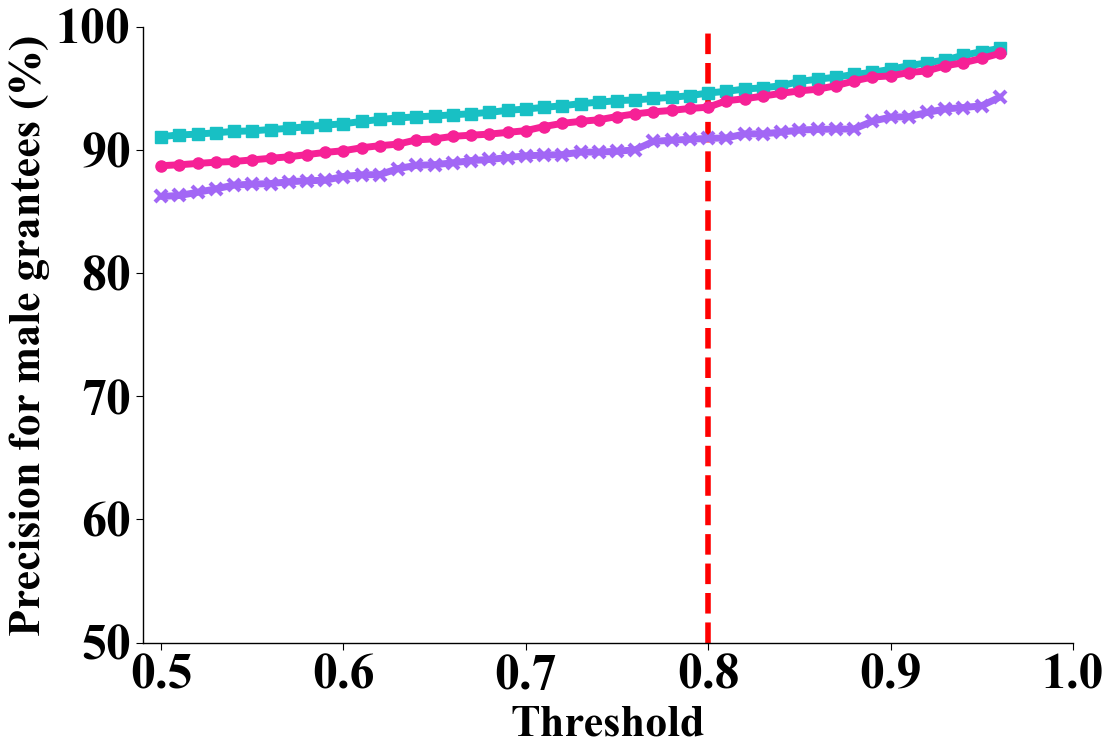

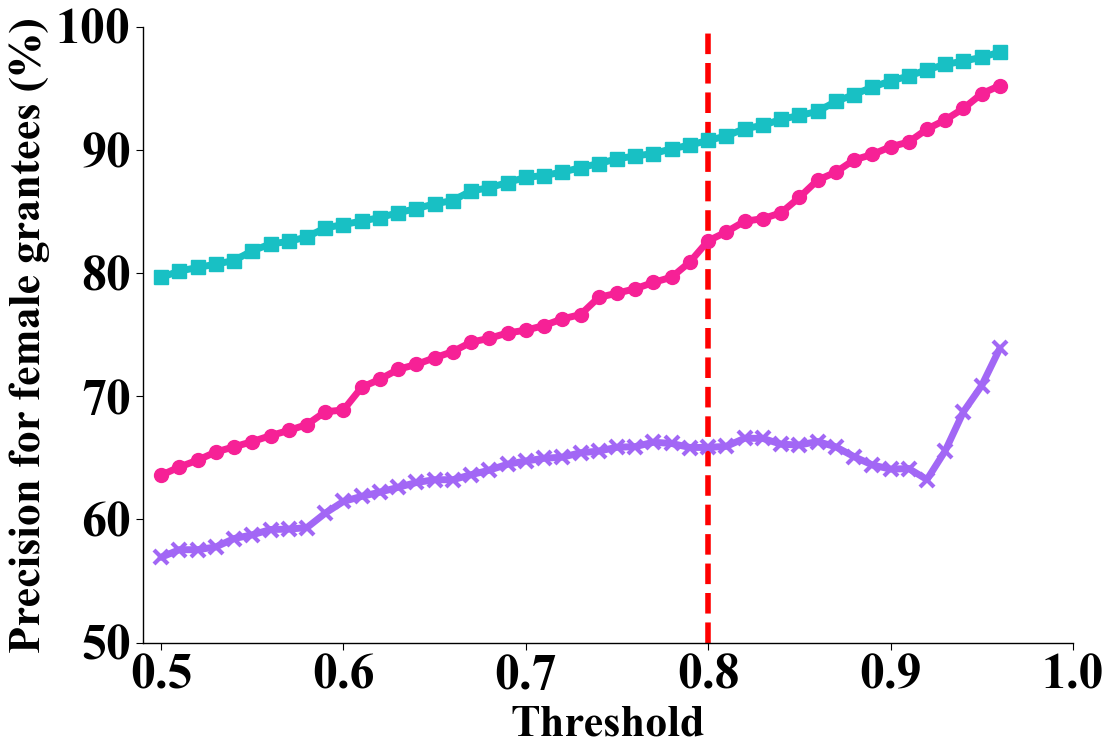

In [167]:
#fig4-grantees-precision
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np  
from cycler import cycler

df = pd.read_csv('/.../grantees.csv', sep='\t')

mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
mpl.rcParams['axes.unicode_minus'] = False  
filtered_char_df = df[df['汉字总数量'] >= 10]
filtered_pinyin_df = df[df['拼音总数量'] >= 10]
filtered_genderize_df = df[df['count'] >= 10]

def calculate_male_precision(df, probability_column, threshold):

    df['male_probability'] = df[probability_column]
    df['predicted_gender'] = df['male_probability'].apply(lambda x: '男' if x >= threshold else '女')
    true_positive = ((df['predicted_gender'] == '男') & (df['gender'] == '男')).sum()
    false_positive = ((df['predicted_gender'] == '男') & (df['gender'] == '女')).sum()

    if (true_positive + false_positive) > 0:
        precision = true_positive / (true_positive + false_positive)
    else:
        precision = 0.0
    
    return precision

def calculate_female_precision(df, probability_column, threshold):

    df['female_probability'] = 1 - df[probability_column]
    df['predicted_gender'] = df['female_probability'].apply(lambda x: '女' if x >= threshold else '男')
    true_positive = ((df['predicted_gender'] == '女') & (df['gender'] == '女')).sum()
    false_positive = ((df['predicted_gender'] == '女') & (df['gender'] == '男')).sum()

    if (true_positive + false_positive) > 0:
        precision = true_positive / (true_positive + false_positive)
    else:
        precision = 0.0
    
    return precision

thresholds = np.arange(0.5, 0.961, 0.01)  
char_male_precisions = []
pinyin_male_precisions = []
genderize_male_precisions = []
char_female_precisions = []
pinyin_female_precisions = []
genderize_female_precisions = []

for threshold in thresholds:
    precision = calculate_male_precision(filtered_char_df, '汉字男性概率', threshold)
    char_male_precisions.append(precision * 100) 

for threshold in thresholds:
    precision = calculate_male_precision(filtered_pinyin_df, '拼音男性概率', threshold)
    pinyin_male_precisions.append(precision * 100) 

for threshold in thresholds:
    precision = calculate_male_precision(filtered_genderize_df, 'genderize_predict_male', threshold)
    genderize_male_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_female_precision(filtered_char_df, '汉字男性概率', threshold)
    char_female_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_female_precision(filtered_pinyin_df, '拼音男性概率', threshold)
    pinyin_female_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_female_precision(filtered_genderize_df, 'genderize_predict_male', threshold)
    genderize_female_precisions.append(precision * 100)  

plt.figure(figsize=(12, 8))
plt.axvline(x=0.8, color='red', linestyle='--',linewidth=4)
plt.ylim(50, 100)  
plt.yticks([i for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.xlim(0.49, 1.0)
plt.xticks([i / 100 for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.plot(thresholds, char_male_precisions, linestyle='-',marker='s',markersize=8, markevery=1, color='#18c0c4', label='Chinese', linewidth=5)
plt.plot(thresholds, pinyin_male_precisions, linestyle='-',marker='o', markersize=8, markevery=1, color='#f62196', label='Chinese Pinyin', linewidth=5)
plt.plot(thresholds, genderize_male_precisions, linestyle='-',marker='x',markersize=8, markeredgewidth=3, markevery=1, color='#A267F5', label='Genderize.io', linewidth=5)
plt.xlabel('Threshold', fontsize=32, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Precision for male grantees (%)', fontsize=32, fontname='Times New Roman', fontweight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(False)
plt.savefig('/.../41.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=4)
plt.ylim(50, 100)  
plt.yticks([i for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.xlim(0.49, 1.0)
plt.xticks([i / 100 for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.plot(thresholds, char_female_precisions, linestyle='-', marker='s', markersize=10, markevery=1, color='#18c0c4', label='Chinese', linewidth=5)
plt.plot(thresholds, pinyin_female_precisions, linestyle='-', marker='o',markersize=10, markevery=1, color='#f62196', label='Chinese Pinyin', linewidth=5)
plt.plot(thresholds, genderize_female_precisions, linestyle='-',marker='x',markersize=10, markeredgewidth=3, markevery=1, color='#A267F5', label='Genderize.io', linewidth=5)
plt.xlabel('Threshold', fontsize=32, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Precision for female grantees (%)', fontsize=32, fontname='Times New Roman', fontweight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(False)
plt.savefig('/.../42.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_97245/2437454653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['male_probability'] = df[probability_column]
/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_97245/2437454653.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_gender'] = df['male_probability'].apply(lambda x: '男' if x >= threshold else '女')
/var/folders/51/w5vwjwvj7wl_p7txgvf8ypbr0000gn/T/ipykernel_97245/2437454653.py:15: SettingWithCopyWarning: 
A 

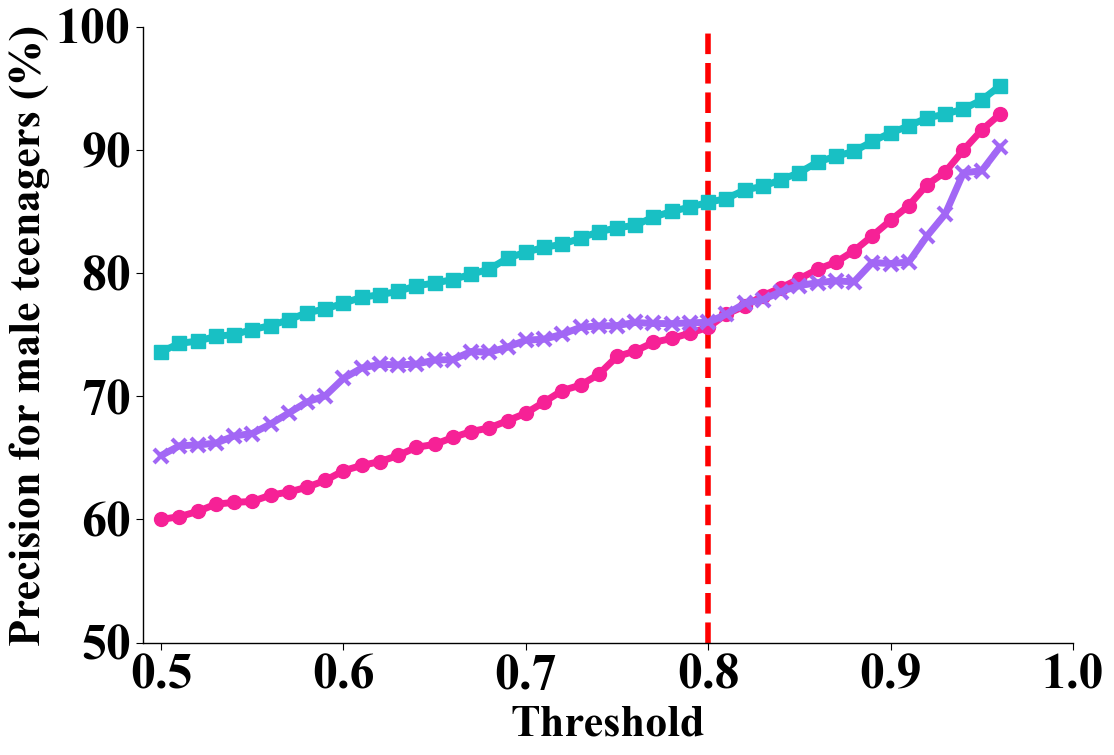

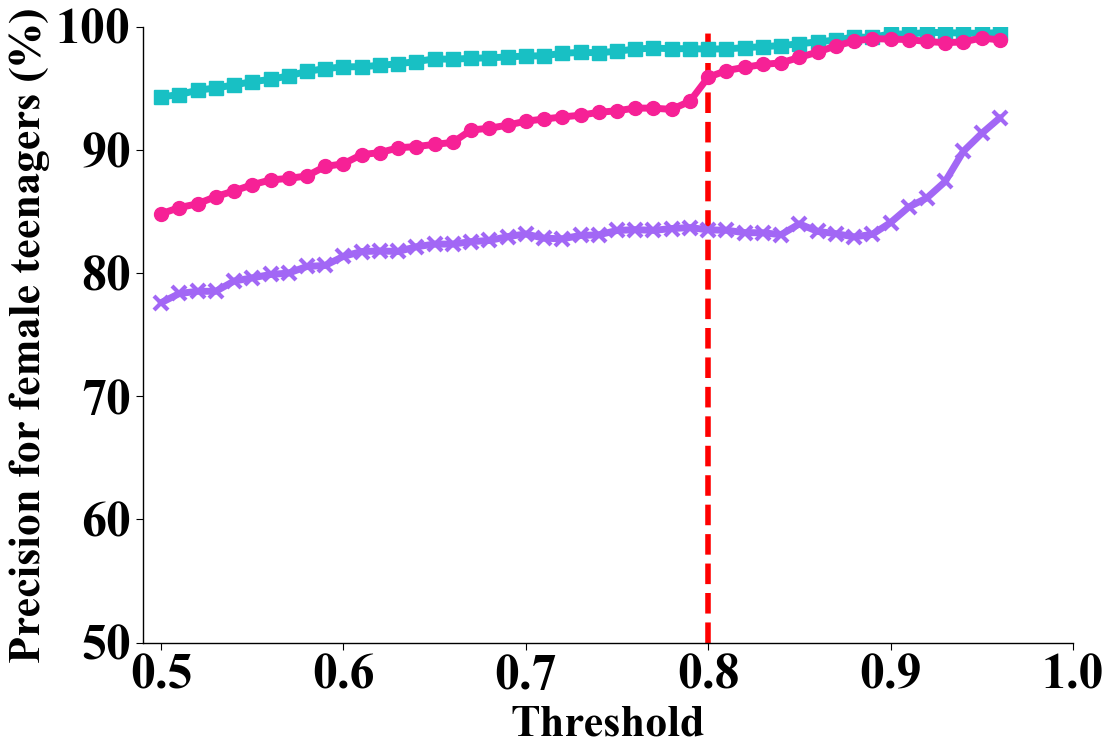

In [171]:
#fig4-teenagers-precision
df = pd.read_csv('/.../teenagers.csv', sep='\t')

mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
mpl.rcParams['axes.unicode_minus'] = False  

filtered_char_df = df[df['汉字总数量'] >= 10]

filtered_pinyin_df = df[df['拼音总数量'] >= 10]

filtered_genderize_df = df[df['Gender Count'] >= 10]

def calculate_male_precision(df, probability_column, threshold):

    df['male_probability'] = df[probability_column]

    df['predicted_gender'] = df['male_probability'].apply(lambda x: '男' if x >= threshold else '女')

    true_positive = ((df['predicted_gender'] == '男') & (df['性别'] == '男')).sum()
    false_positive = ((df['predicted_gender'] == '男') & (df['性别'] == '女')).sum()
    
    if (true_positive + false_positive) > 0:
        precision = true_positive / (true_positive + false_positive)
    else:
        precision = 0.0
    
    return precision

def calculate_female_precision(df, probability_column, threshold):
    df['female_probability'] = 1 - df[probability_column]  
    df['predicted_gender'] = df['female_probability'].apply(lambda x: '女' if x >= threshold else '男')
    true_positive = ((df['predicted_gender'] == '女') & (df['性别'] == '女')).sum()
    false_positive = ((df['predicted_gender'] == '女') & (df['性别'] == '男')).sum()
      
    if (true_positive + false_positive) > 0:
        precision = true_positive / (true_positive + false_positive)
    else:
        precision = 0.0
    
    return precision

thresholds = np.arange(0.5, 0.961, 0.01)  
char_male_precisions = []
pinyin_male_precisions = []
genderize_male_precisions = []

char_female_precisions = []
pinyin_female_precisions = []
genderize_female_precisions = []

for threshold in thresholds:
    precision = calculate_male_precision(filtered_char_df, '汉字男性概率', threshold)
    char_male_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_male_precision(filtered_pinyin_df, '拼音男性概率', threshold)
    pinyin_male_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_male_precision(filtered_genderize_df, 'genderize_predict_male', threshold)
    genderize_male_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_female_precision(filtered_char_df, '汉字男性概率', threshold)
    char_female_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_female_precision(filtered_pinyin_df, '拼音男性概率', threshold)
    pinyin_female_precisions.append(precision * 100)  

for threshold in thresholds:
    precision = calculate_female_precision(filtered_genderize_df, 'genderize_predict_male', threshold)
    genderize_female_precisions.append(precision * 100)  


plt.figure(figsize=(12, 8))
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=4)
plt.ylim(50, 100) 
plt.yticks([i for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.xlim(0.49, 1.0)
plt.xticks([i / 100 for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.plot(thresholds, char_male_precisions, linestyle='-',marker='s',markersize=10, markevery=1, color='#18c0c4', label='Chinese', linewidth=5)
plt.plot(thresholds, pinyin_male_precisions, linestyle='-',marker='o',markersize=10, markevery=1, color='#f62196', label='Chinese Pinyin', linewidth=5)
plt.plot(thresholds, genderize_male_precisions, linestyle='-',marker='x',markersize=10, markeredgewidth=3, markevery=1, color='#A267F5', label='Genderize.io', linewidth=5)
plt.xlabel('Threshold', fontsize=32, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Precision for male teenagers (%)', fontsize=32, fontname='Times New Roman', fontweight='bold')
#plt.legend(fontsize=30, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# 去掉右边和上边的框
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(False)

plt.savefig('/.../43.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=4)
plt.ylim(50, 100)  
plt.yticks([i for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.xlim(0.49, 1.0)
plt.xticks([i / 100 for i in range(50, 105, 10)], fontsize=36, fontname='Times New Roman', fontweight='bold')
plt.plot(thresholds, char_female_precisions, linestyle='-',marker='s',markersize=10, markevery=1, color='#18c0c4', label='Chinese', linewidth=5)
plt.plot(thresholds, pinyin_female_precisions, linestyle='-',marker='o',markersize=10, markevery=1, color='#f62196', label='Chinese Pinyin', linewidth=5)
plt.plot(thresholds, genderize_female_precisions, linestyle='-', marker='x',markersize=10, markeredgewidth=3, markevery=1, color='#A267F5', label='Genderize.io', linewidth=5)
plt.xlabel('Threshold', fontsize=32, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Precision for female teenagers (%)', fontsize=32, fontname='Times New Roman', fontweight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(False)

plt.savefig('/.../44.png', dpi=300, bbox_inches='tight')
plt.show()



In [177]:
# merge-fig4
from PIL import Image, ImageDraw, ImageFont

img_a = Image.open('/.../41.png')
img_b = Image.open('/.../42.png')
img_c = Image.open('/.../43.png')
img_d = Image.open('/.../44.png')

width_a, height_a = img_a.size
width_b, height_b = img_b.size
width_c, height_c = img_c.size
width_d, height_d = img_d.size

left_width = max(width_a, width_c)
right_width = max(width_b, width_d)

legend_height = 250
combined_height = height_a + height_c + 120
combined_height_with_legend = combined_height + legend_height
combined_width = left_width + right_width + 100

combined_img = Image.new('RGB', (combined_width, combined_height_with_legend), (255, 255, 255))
draw = ImageDraw.Draw(combined_img)

combined_img.paste(img_a, (30, legend_height + 30))
combined_img.paste(img_b, (left_width + 30, legend_height + 30))
combined_img.paste(img_c, (30, height_a + legend_height + 90))
combined_img.paste(img_d, (left_width + 30, height_a + legend_height + 90))

try:
    font = ImageFont.truetype("Times New Roman Bold.ttf", 140)
except IOError:
    font = ImageFont.load_default()

draw.text((30, legend_height - 100), "(a)", font=font, fill=(0, 0, 0))
draw.text((left_width + 30, legend_height - 100), "(b)", font=font, fill=(0, 0, 0))
draw.text((30, height_a + legend_height - 100), "(c)", font=font, fill=(0, 0, 0))
draw.text((left_width + 30, height_a + legend_height - 100), "(d)", font=font, fill=(0, 0, 0))
legends = [
    {"color": "#18c0c4", "label": "Chinese",         "marker": "s"},  
    {"color": "#f62196", "label": "Chinese Pinyin", "marker": "o"},  
    {"color": "#A267F5", "label": "Genderize.io",   "marker": "x"}   
]

def draw_marker(draw_obj, cx, cy, marker_style, color, marker_size=40, line_width=6):
    half = marker_size // 2
    if marker_style == 'o':
        box = [cx - half, cy - half, cx + half, cy + half]
        draw_obj.ellipse(box, fill=color)
    elif marker_style == 's':
        box = [cx - half, cy - half, cx + half, cy + half]
        draw_obj.rectangle(box, fill=color)
    elif marker_style == 'x':
        draw_obj.line((cx - half, cy - half, cx + half, cy + half), fill=color, width=line_width)
        draw_obj.line((cx - half, cy + half, cx + half, cy - half), fill=color, width=line_width)
    else:
        box = [cx - half, cy - half, cx + half, cy + half]
        draw_obj.ellipse(box, fill=color)

line_length = 220
line_height = 15  
margin = 40      
group_margin = 200
y_position = -5   

total_width = 0
for legend in legends:
    bbox = draw.textbbox((0, 0), legend["label"], font=font)
    label_width = bbox[2] - bbox[0]
    total_width += (line_length + margin + label_width + group_margin)

start_x_position = ((combined_width - total_width) // 2) - 10
x_position = start_x_position

for legend in legends:
    color = legend["color"]
    label = legend["label"]
    marker = legend["marker"]

    bbox = draw.textbbox((0, 0), label, font=font)
    label_width = bbox[2] - bbox[0]
    label_height = bbox[3] - bbox[1]

    line_center_y = y_position + (label_height // 2)
    draw.line([x_position, line_center_y, x_position + line_length, line_center_y],
              fill=color, width=line_height)
    marker_center_x = x_position + line_length // 2
    marker_center_y = line_center_y
    draw_marker(draw, marker_center_x, marker_center_y, marker, color, marker_size=40, line_width=line_height)

    label_x_position = x_position + line_length + margin
    draw.text((label_x_position, y_position), label, font=font, fill=(0, 0, 0))

    x_position += line_length + margin + label_width + group_margin

combined_img.save('/.../Figure4.png')
combined_img.show()
